## **Load the DataSet**

In [688]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [604]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [605]:
pathForTrainData = '/content/drive/MyDrive/train.csv'
trainData = pd.read_csv(pathForTrainData)
print(trainData.items())

<generator object DataFrame.items at 0x7cb960719850>


In [606]:
pathForTestData = '/content/drive/MyDrive/test.csv'
testData = pd.read_csv(pathForTestData)
print(testData.head())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6

# **Information about the data**

In [607]:
print(trainData.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [608]:
print(trainData.shape)
print(testData.shape)

(1460, 81)
(1459, 80)


In [609]:
print(trainData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [610]:
print(testData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [611]:
#Check for duplicate rows in train data
duplicateRowsTrainData = trainData[trainData.duplicated()]
print(duplicateRowsTrainData)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]


In [612]:
#Check for duplicate rows in test data
duplicateRowsTestData = testData[testData.duplicated()]
print(duplicateRowsTestData)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 80 columns]


In [613]:
# Find unique values in non numeric columns
nonNumericColumns= trainData.select_dtypes(exclude='number')
print(nonNumericColumns)
for column in nonNumericColumns:
    unique_values = trainData[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

     MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition

In [614]:
# Check for Missing Values in Train Data
missingValuesInTrainData = trainData.isnull().sum()
missingValuesInTrainData = missingValuesInTrainData[missingValuesInTrainData > 0]
print(trainData)
print(type(missingValuesInTrainData))
print(missingValuesInTrainData)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [615]:
# Check for Missing Values in Test data
missingValuesInTestData = testData.isnull().sum()
missingValuesInTestData = missingValuesInTestData[missingValuesInTestData > 0]
print(type(missingValuesInTestData))
print(missingValuesInTestData)

<class 'pandas.core.series.Series'>
MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [616]:
# Replace the missing values with 'None' for Categorical values and 0 for numeric values
#test1= trainData.fillna({'LotFrontage': 0, 'Alley': 'None','MasVnrType': 'None','MasVnrArea': 0,'BsmtQual': 'None','BsmtCond': 'None','BsmtExposure': 'None','BsmtFinType1': 'None','BsmtFinType2': 'None','FireplaceQu': 'None','GarageType': 'None','GarageYrBlt': 0,'GarageFinish': 'None','GarageQual': 'None','GarageCond': 'None','PoolQC': 'None','Fence': 'None','MiscFeature': 'None'})
#test2= testData.fillna({'LotFrontage': 0,'Alley': 'None','MasVnrType': 'None','MasVnrArea': 0,'BsmtQual': 'None','BsmtCond': 'None','BsmtExposure': 'None','BsmtFinType1': 'None','BsmtFinType2': 'None','FireplaceQu': 'None','GarageType': 'None','GarageYrBlt': 0,'GarageFinish': 'None','GarageQual': 'None','GarageCond': 'None','PoolQC': 'None','Fence': 'None','MiscFeature': 'None'})


Replace missiing values for Train Data




In [617]:
#Replace the missing values with 'None' for Categorical values
nonNumericColumnsTrainData= trainData.select_dtypes(exclude='number')
for column in nonNumericColumnsTrainData:
    trainData[column].fillna('None',inplace=True)


In [618]:
# Replace the missing values with 0 for Numeric values
numericColumns= trainData.select_dtypes(include='number')
for column in numericColumns:
    trainData[column].fillna(0,inplace = True)


In [619]:
# Check for Missing Values in train dataframe after replacement
print(trainData.isnull().sum());

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


Replace missiing values for Train Data

In [620]:
#Replace the missing values with 'None' for Categorical values
nonNumericColumnsTestData= testData.select_dtypes(exclude='number')
for column in nonNumericColumnsTestData:
    testData[column].fillna('None',inplace=True)

In [621]:
# Replace the missing values with 0 for Numeric values
nonNumericColumnsTestData= testData.select_dtypes(include='number')
for column in nonNumericColumnsTestData:
    testData[column].fillna(0,inplace = True)

In [622]:
# Check for Missing Values in test dataframe after replacement
print(testData.isnull().sum().sum());

0


In [623]:
trainData.drop(index=1,inplace=True)
trainData.shape


(1459, 81)

# Data Visualization

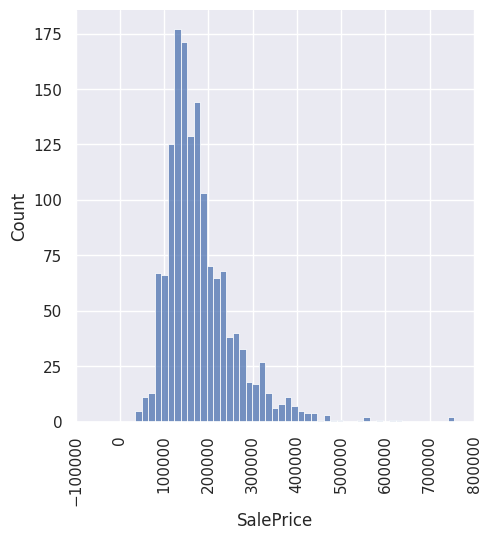

In [624]:
sns.displot(data=trainData, x="SalePrice").set_xticklabels(rotation=90)


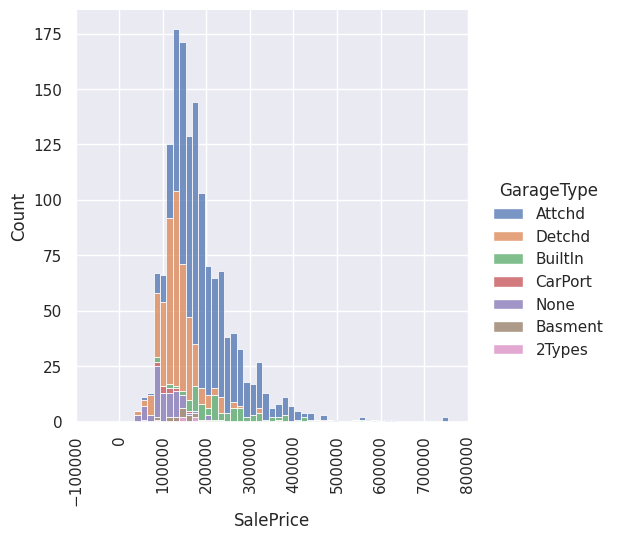

In [625]:
sns.displot(data=trainData, x="SalePrice", hue="GarageType", multiple="stack").set_xticklabels(rotation=90)


<Axes: xlabel='SalePrice', ylabel='Count'>

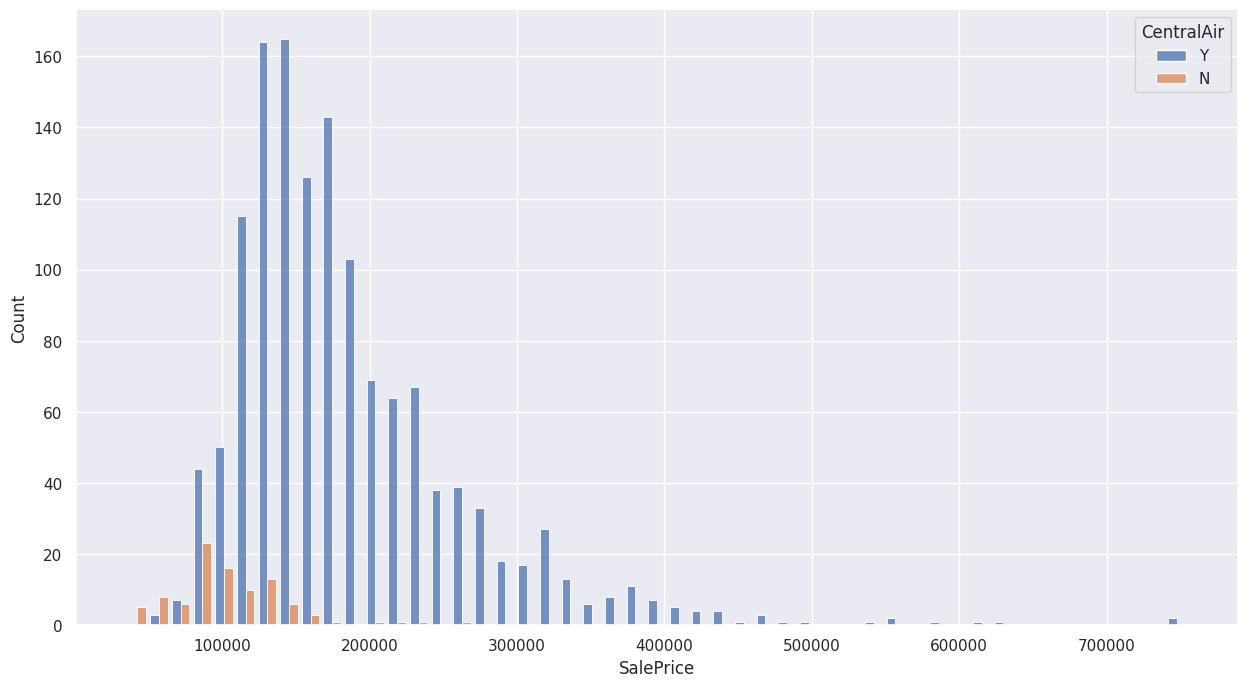

In [626]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data=trainData, x="SalePrice", hue="CentralAir", multiple="dodge", shrink=.8)


<Axes: xlabel='YrSold', ylabel='SalePrice'>

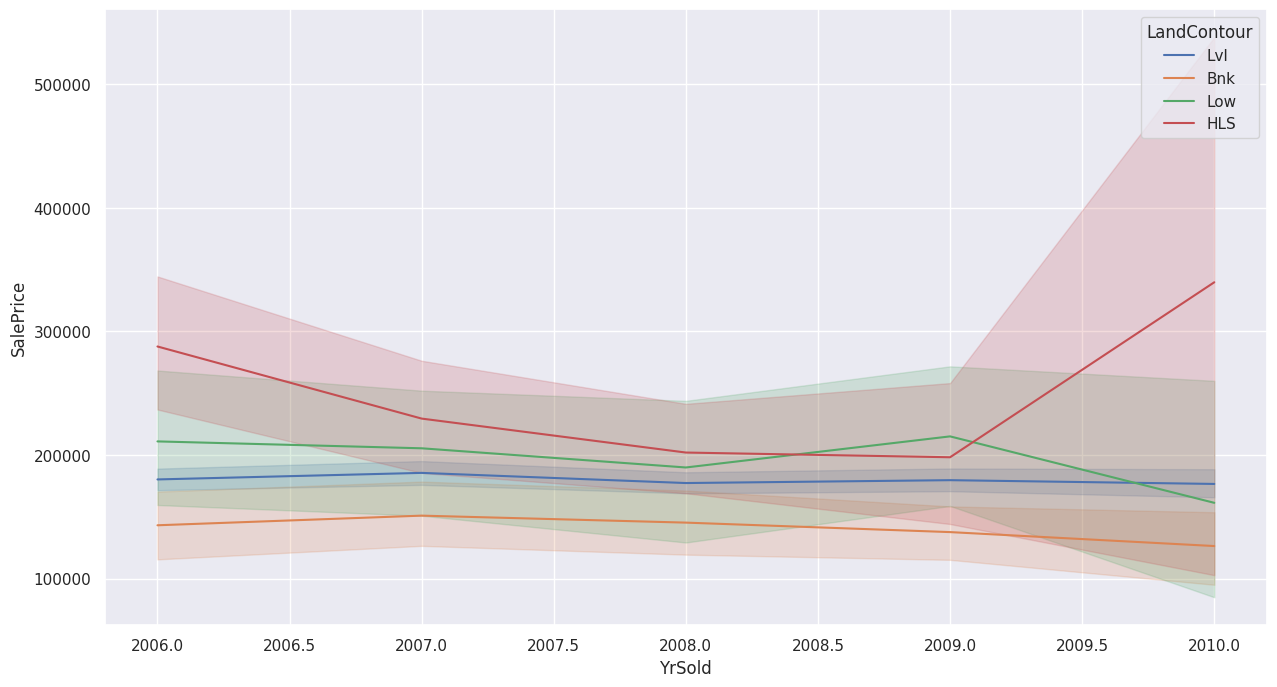

In [627]:
sns.lineplot(data=trainData, x="YrSold", y="SalePrice",hue="LandContour")

<Axes: xlabel='SalePrice', ylabel='Density'>

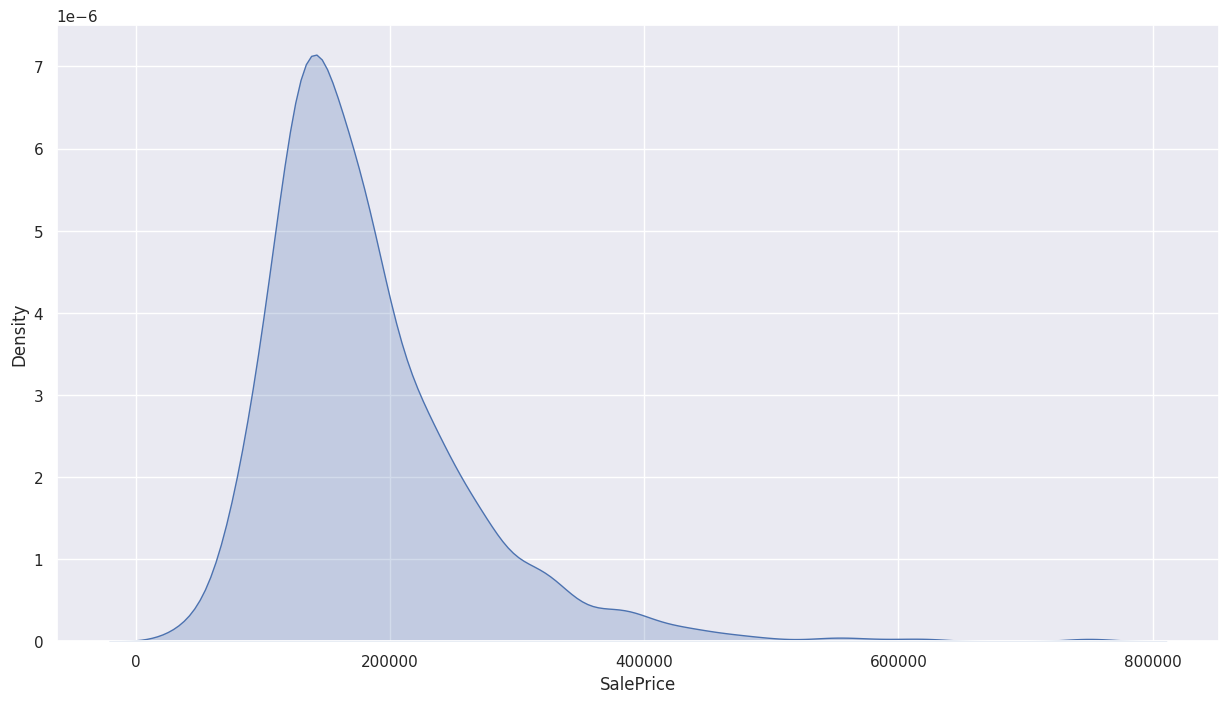

In [628]:
sns.kdeplot(data=trainData, x="SalePrice", fill =True)


<Axes: xlabel='SalePrice', ylabel='Density'>

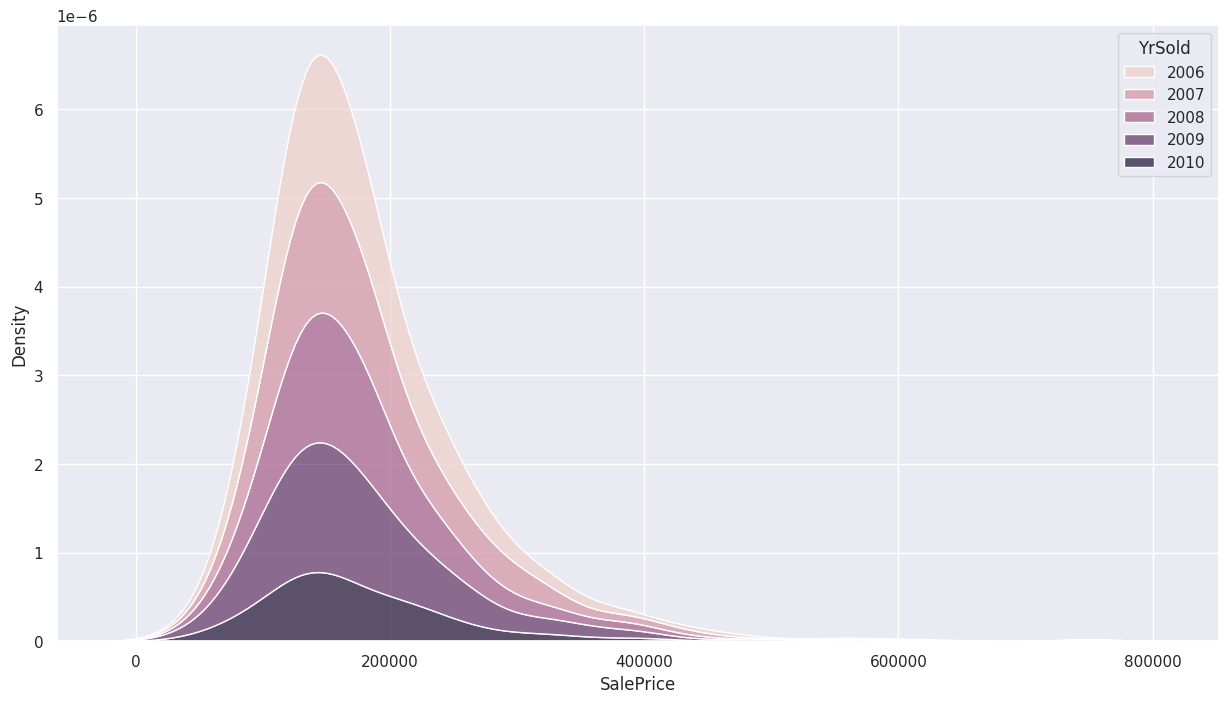

In [629]:
sns.kdeplot(data=trainData, x="SalePrice", fill =True,hue="YrSold", multiple="stack")


<Axes: xlabel='YrSold', ylabel='SalePrice'>

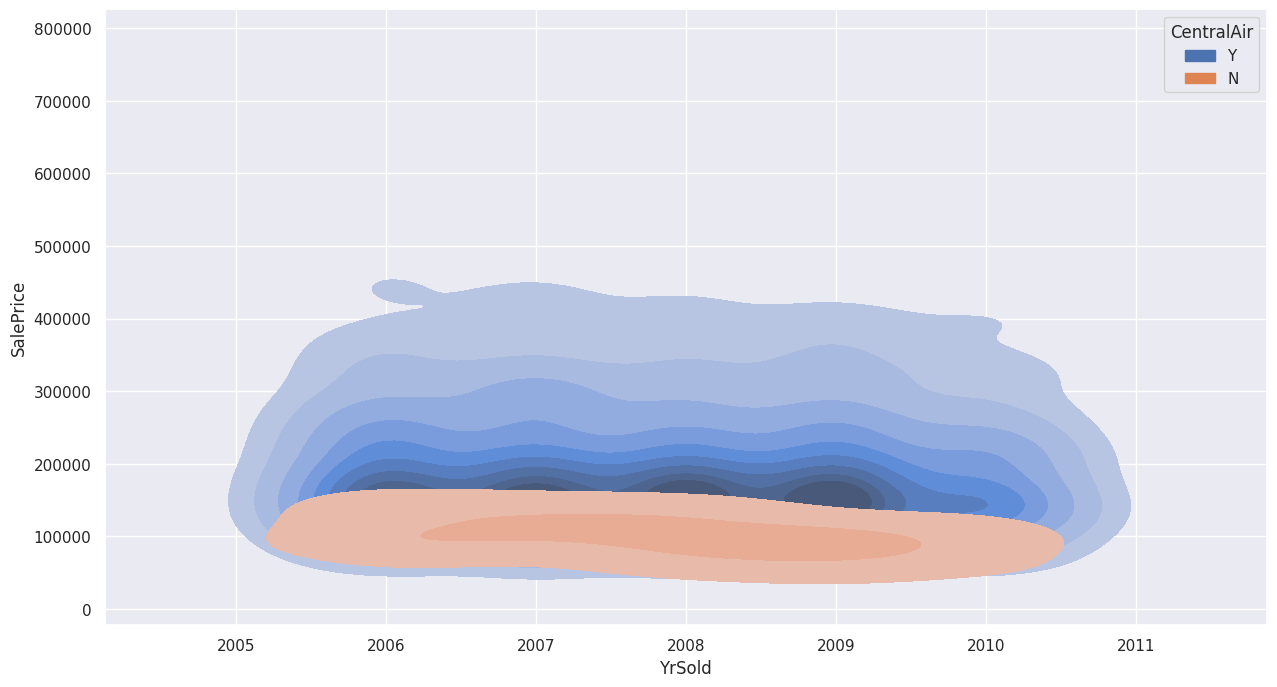

In [630]:
sns.kdeplot(data=trainData, x="YrSold", y="SalePrice", hue="CentralAir",fill=True)


<Axes: xlabel='SalePrice', ylabel='Proportion'>

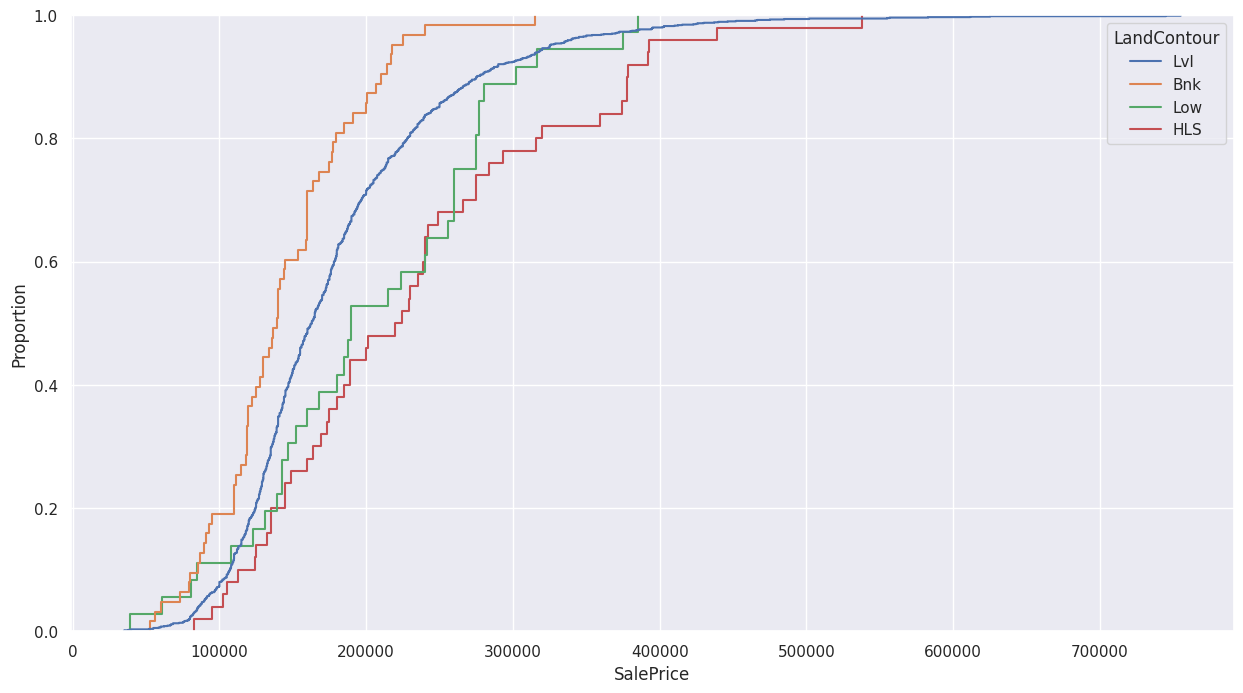

In [631]:
sns.ecdfplot(data=trainData, x="SalePrice", hue="LandContour")


<Axes: xlabel='YrSold', ylabel='SalePrice'>

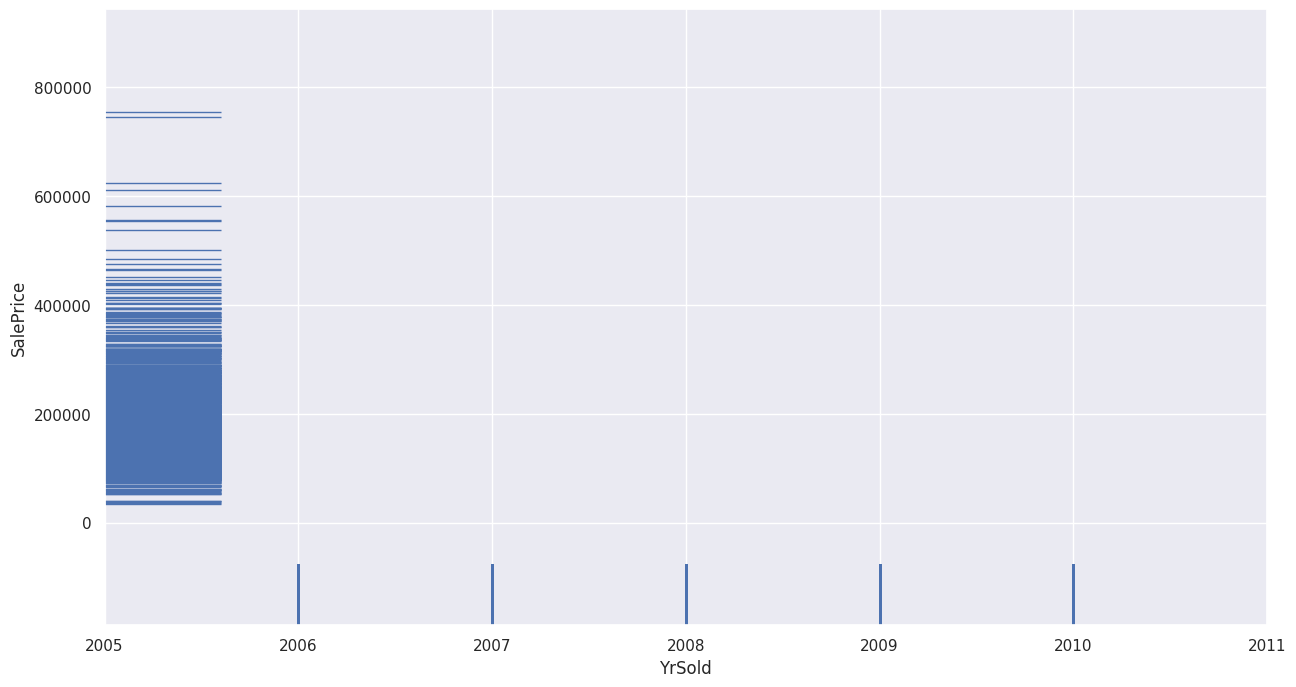

In [632]:
sns.rugplot(data=trainData, x="YrSold", y="SalePrice", height=.1)


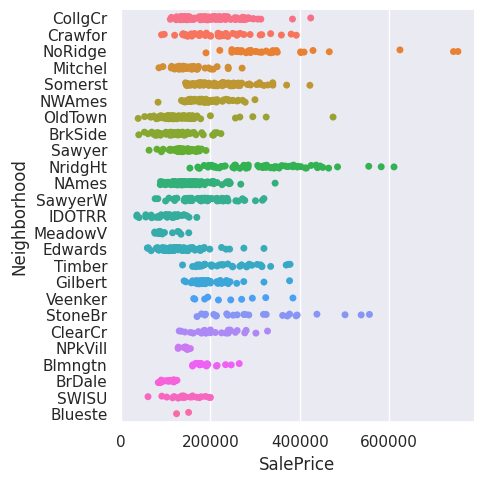

In [633]:
# Categorical scatterplots
sns.catplot(data=trainData, x="SalePrice", y="Neighborhood",hue="Neighborhood", kind="strip")

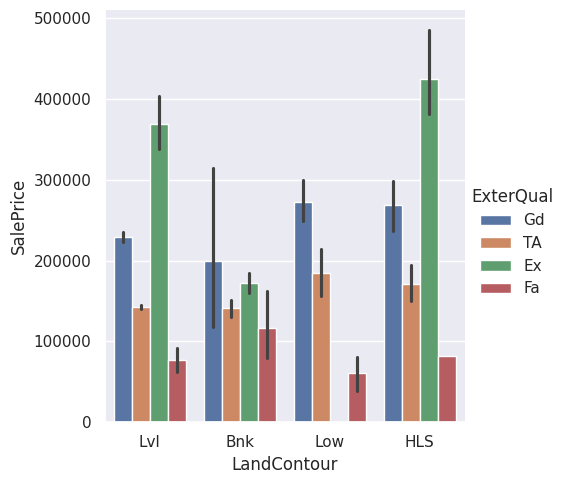

In [634]:
#Categorical estimate plots
sns.catplot(data=trainData, kind="bar", x="LandContour", y="SalePrice", hue="ExterQual")

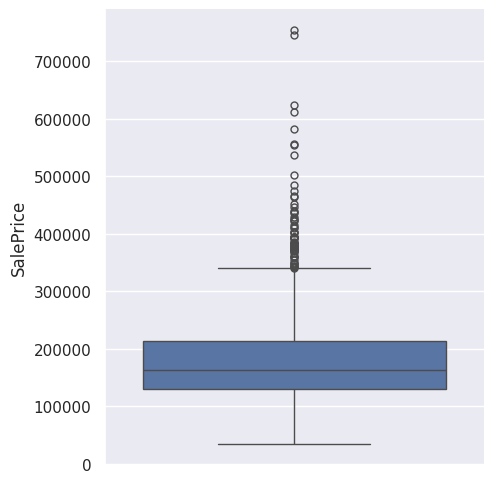

In [635]:
# Categorical distribution plots
sns.catplot(data=trainData, kind="box", y="SalePrice")

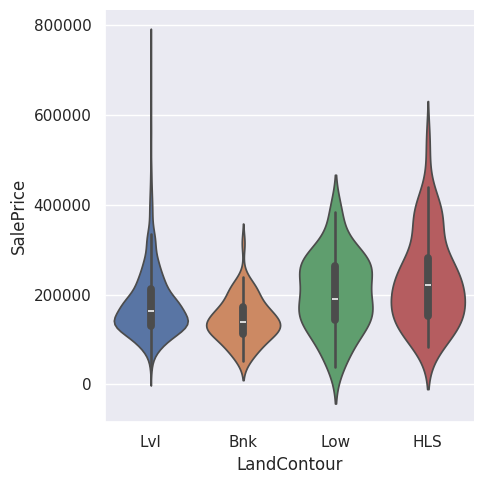

In [636]:
sns.catplot(data=trainData, kind="violin", x="LandContour", y="SalePrice",hue="LandContour")

<Axes: xlabel='LandContour', ylabel='SalePrice'>

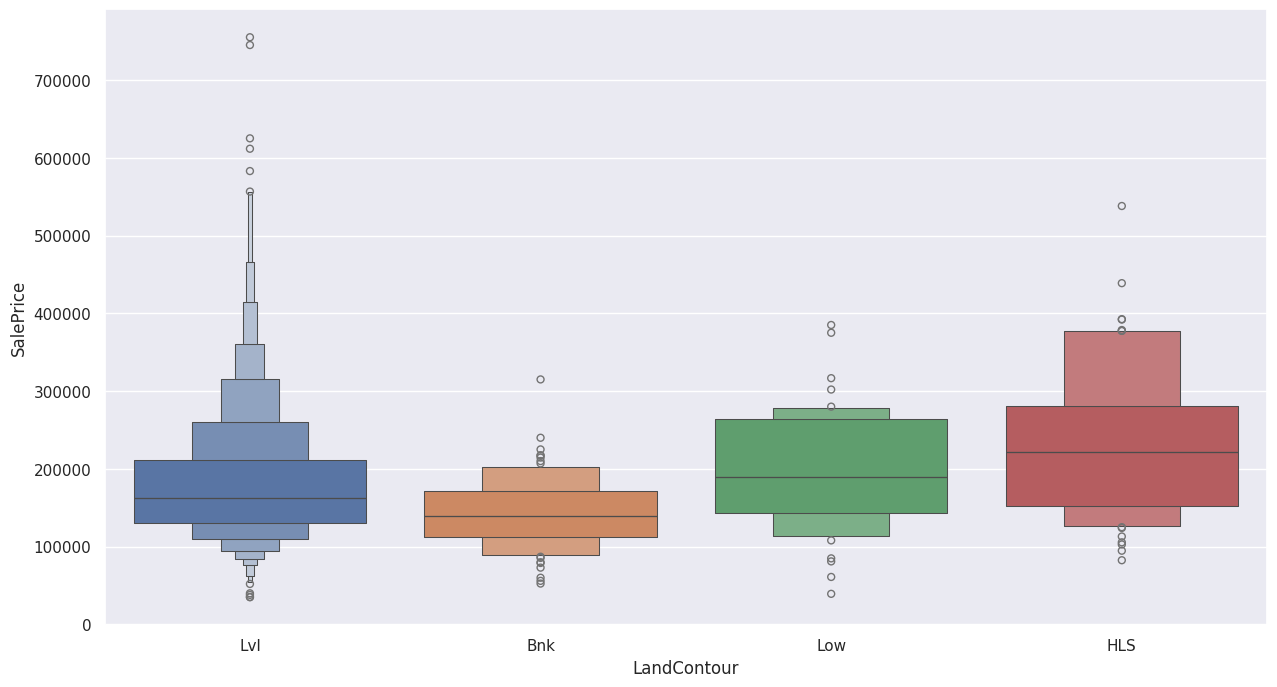

In [637]:
sns.boxenplot(data=trainData, x="LandContour", y="SalePrice", hue="LandContour")

<Axes: xlabel='BldgType', ylabel='SalePrice'>

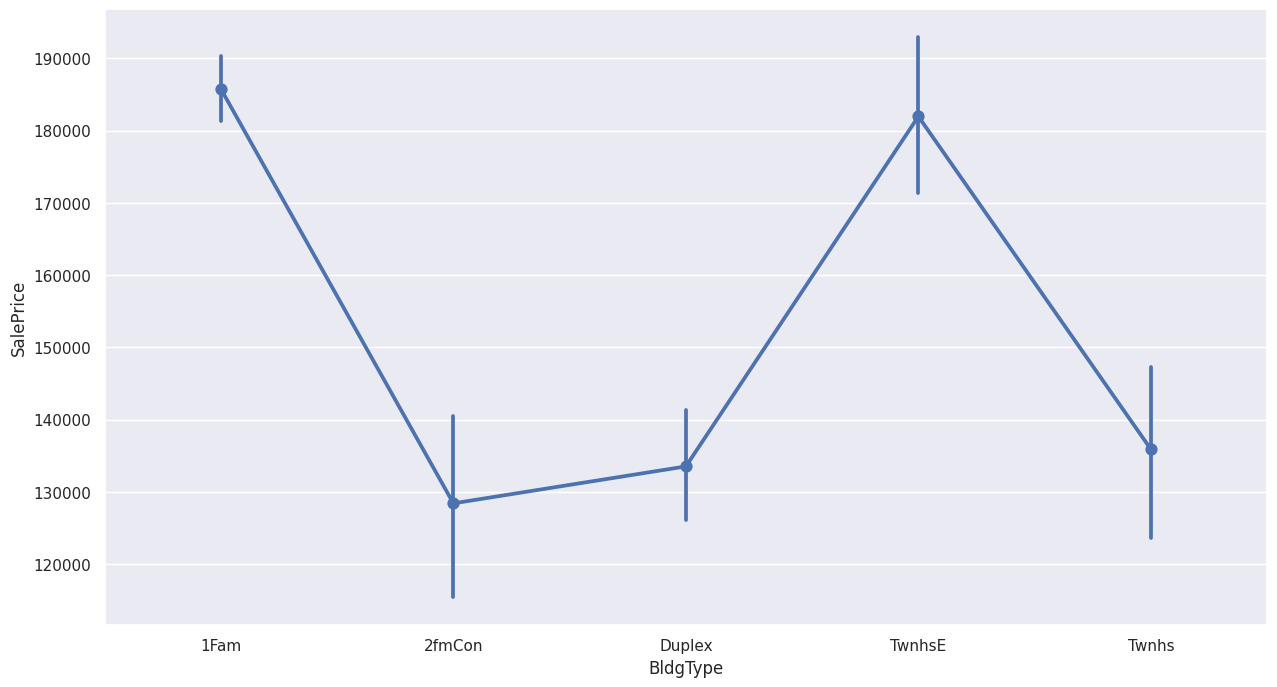

In [638]:
sns.pointplot(data=trainData, x="BldgType", y="SalePrice")

<Axes: xlabel='YrSold', ylabel='SalePrice'>

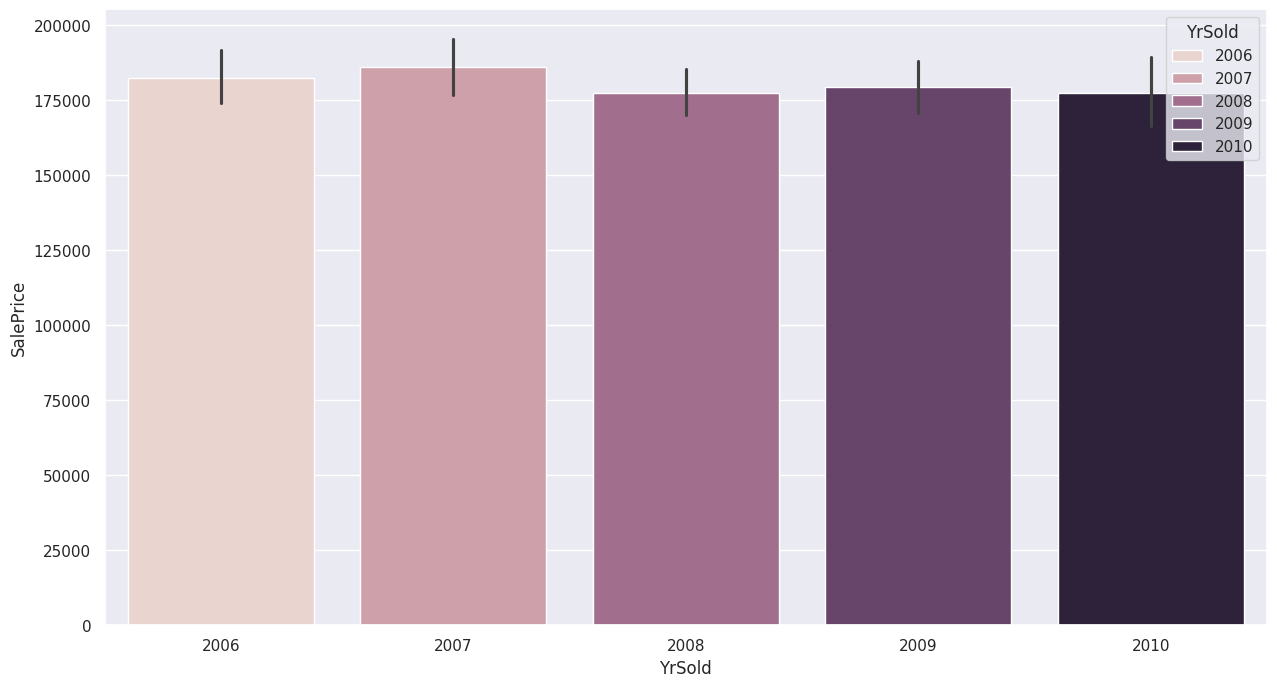

In [639]:
sns.barplot(data=trainData, x="YrSold", y="SalePrice", hue="YrSold")


<Axes: xlabel='BsmtQual', ylabel='count'>

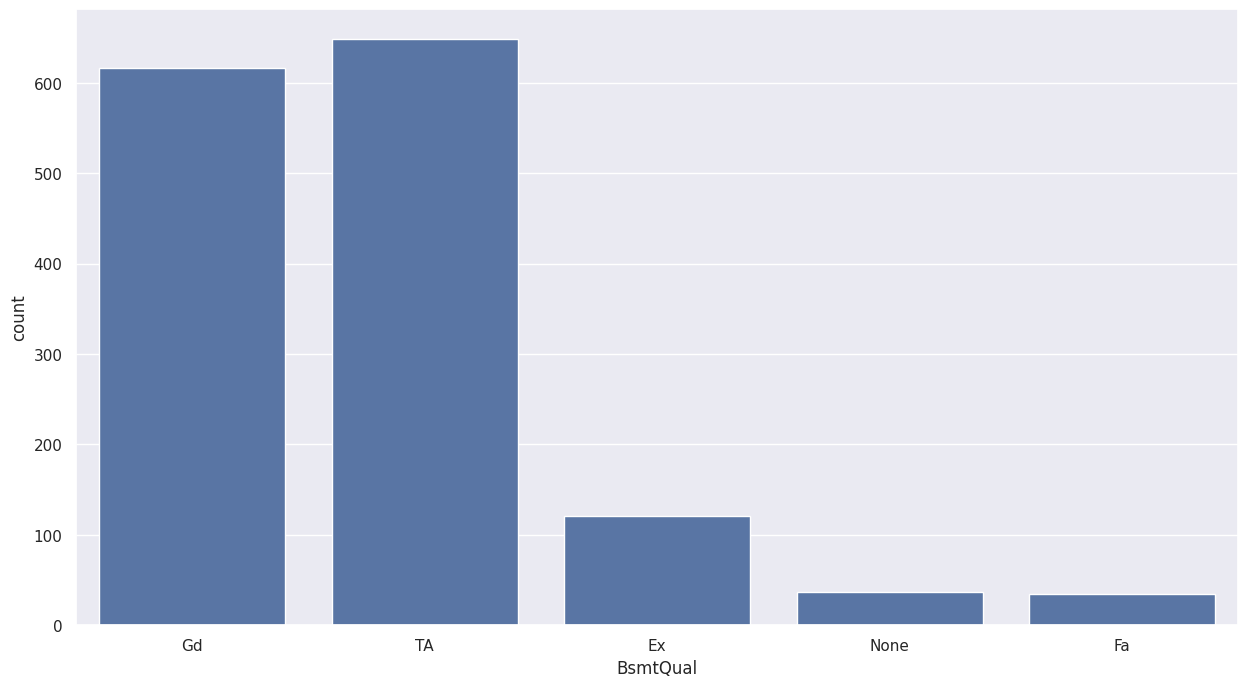

In [640]:
sns.countplot(data=trainData, x="BsmtQual")

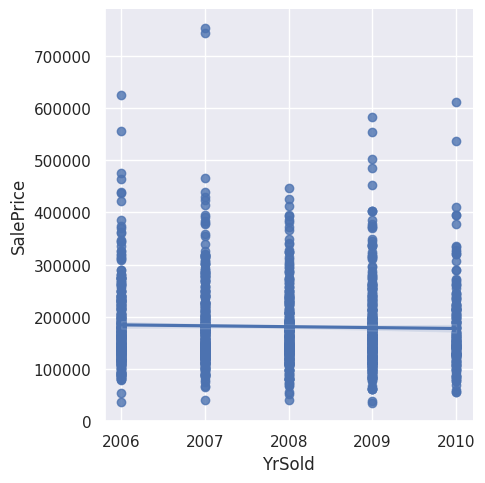

In [641]:
sns.lmplot(data=trainData, x="YrSold", y="SalePrice")


<Axes: xlabel='YrSold', ylabel='SalePrice'>

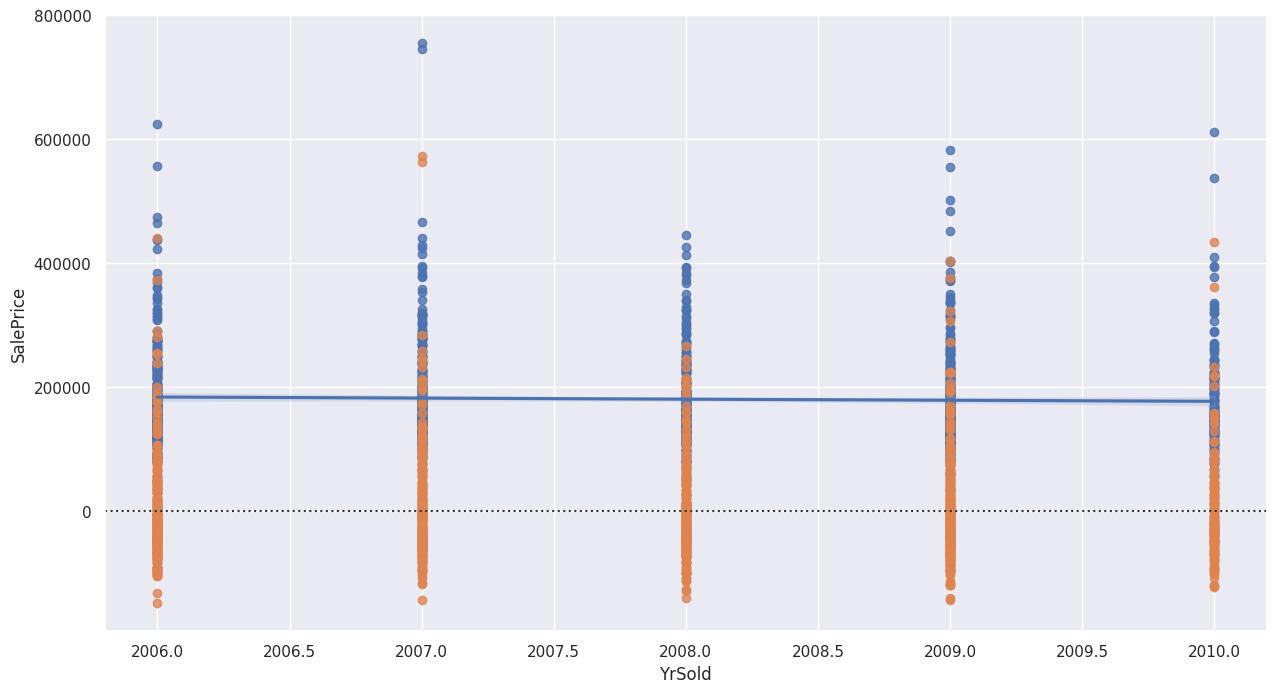

In [642]:
sns.regplot(data=trainData, x="YrSold", y="SalePrice")
sns.residplot(data=trainData, x="YrSold", y="SalePrice")


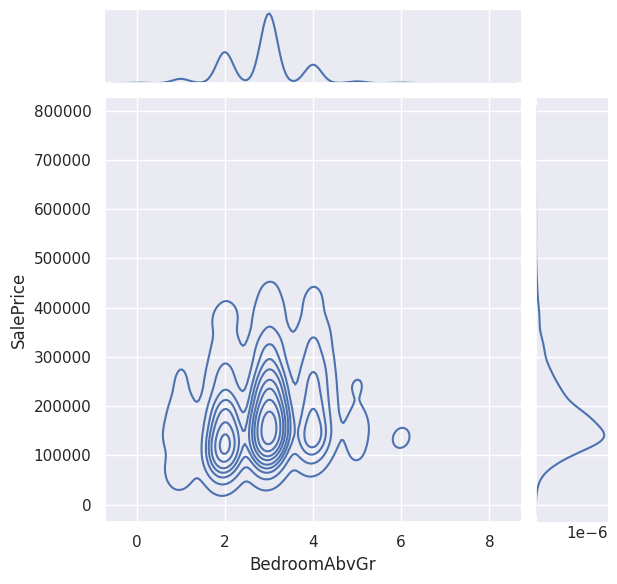

In [643]:
# Joint Plot - Understand the relationship between two variables as well as see the distribution of each variable.
# In middle - relationship plot (how y and x are related)
sns.jointplot(data=trainData, x="BedroomAbvGr", y="SalePrice",kind="kde")


### Facet Grid
Backbone for relplot <br>
Idea- creating small multiples (of categories)

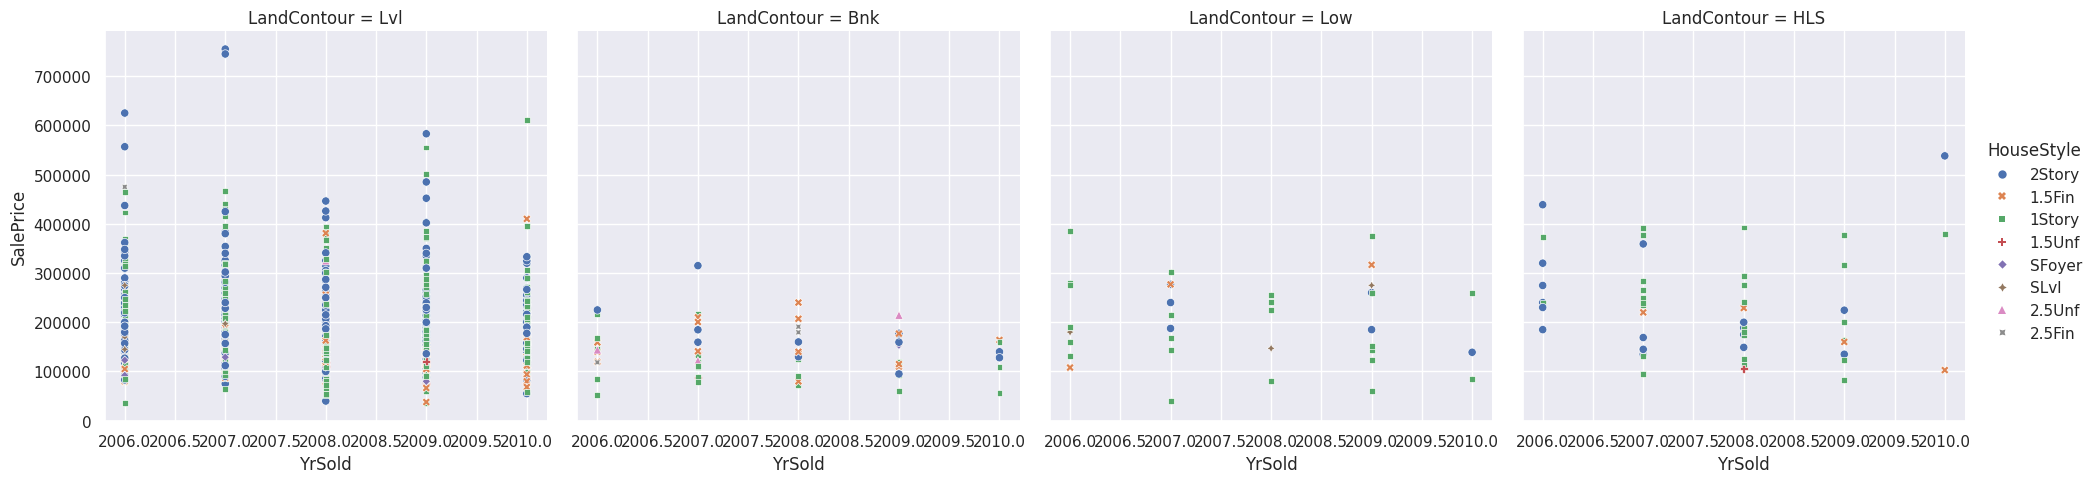

In [644]:
sns.relplot(data=trainData,x="YrSold", y="SalePrice", col="LandContour",hue="HouseStyle",style="HouseStyle")

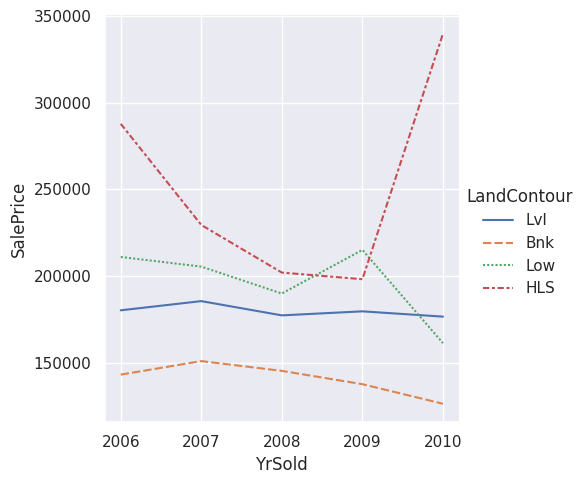

In [645]:
sns.relplot(data=trainData, x="YrSold", y="SalePrice", kind="line", hue="LandContour", style="LandContour", errorbar = None , estimator="mean" )

## Handling Outliers
Interquartile Range (IQR) method

In [646]:
# print(trainData['SalePrice'].describe());

In [647]:
# percentile25 = trainData['SalePrice'].quantile(0.25)
# percentile75 = trainData['SalePrice'].quantile(0.75)
# print("75th quartile: ",percentile75)
# print("25th quartile: ",percentile25)
# # We need iqr for calculating the upper and lower limit
# iqr = percentile75 - percentile25
# print ("IQR: ",iqr)
# upper_limit = percentile75 + 1.5 * iqr
# lower_limit = percentile25 - 1.5 * iqr.

# print("Upper limit",upper_limit)
# print("Lower limit",lower_limit)

In [648]:
# trainData[trainData['SalePrice'] > upper_limit]

In [649]:
# trainData[trainData['SalePrice'] < lower_limit]

## Convert Categorical Values to numerical Values

In [650]:
trainData['Neighborhood'].unique()

array(['CollgCr', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes',
       'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW',
       'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'Veenker',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [651]:
nonNumericColumns= trainData.select_dtypes(exclude='number')
trainData[nonNumericColumns.columns] = nonNumericColumns[nonNumericColumns.columns].apply(LabelEncoder().fit_transform)
trainData.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000
5,6,50,3,85.0,14115,1,1,0,3,0,...,0,3,2,3,700,10,2009,8,4,143000
6,7,20,3,75.0,10084,1,1,3,3,0,...,0,3,4,1,0,8,2007,8,4,307000
7,8,60,3,0.0,10382,1,1,0,3,0,...,0,3,4,3,350,11,2009,8,4,200000
8,9,50,4,51.0,6120,1,1,3,3,0,...,0,3,4,1,0,4,2008,8,0,129900
9,10,190,3,50.0,7420,1,1,3,3,0,...,0,3,4,1,0,1,2008,8,4,118000
10,11,20,3,70.0,11200,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,129500


In [652]:
trainData['Neighborhood'].unique()

array([ 5,  6, 15, 11, 21, 14, 17,  3, 19, 16, 12, 20,  9, 10,  7, 23,  8,
       24, 22,  4, 13,  0,  2, 18,  1])

<Axes: >

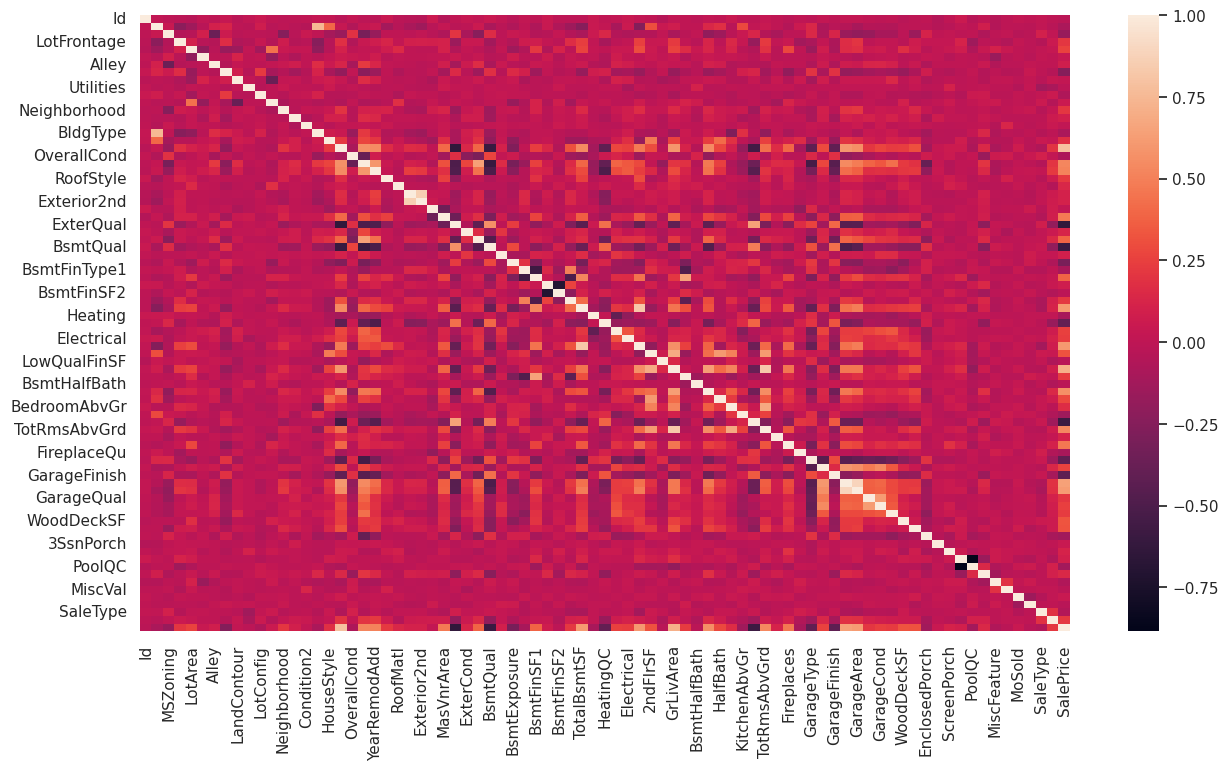

In [653]:
sns.heatmap(trainData.corr())

In [654]:
corr = trainData[trainData.columns].corr()
corr.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.010136,-0.006156,-0.019018,-0.033369,0.009002,-0.002829,0.033052,-0.019306,0.013307,...,0.057021,-0.033888,0.000144,-0.038363,-0.006353,0.020616,-0.000016,0.020167,-0.005565,-0.021931
MSSubClass,0.010136,1.000000,0.035882,-0.214723,-0.139873,-0.024937,0.099471,0.119793,-0.002752,-0.022865,...,0.008244,-0.005184,0.086662,-0.047005,-0.007738,-0.013882,-0.021783,0.012656,-0.024822,-0.084302
MSZoning,-0.006156,0.035882,1.000000,-0.051237,-0.034455,0.087656,-0.368085,0.061923,-0.017845,-0.001193,...,-0.003130,0.002884,-0.061279,-0.005559,0.009290,-0.031514,-0.020649,0.097450,0.009500,-0.166872
LotFrontage,-0.019018,-0.214723,-0.051237,1.000000,0.100794,-0.025139,-0.044635,0.163292,-0.067109,-0.043529,...,0.114153,-0.134658,-0.009815,-0.016709,-0.059576,0.019163,-0.011825,-0.043955,0.054137,0.209651
LotArea,-0.033369,-0.139873,-0.034455,0.100794,1.000000,-0.197128,-0.029674,-0.165300,-0.149069,0.010122,...,0.077668,-0.065164,0.036062,0.106125,0.038062,0.001174,-0.014302,0.012313,0.034183,0.263845
Street,0.009002,-0.024937,0.087656,-0.025139,-0.197128,1.000000,-0.001588,-0.010259,0.115985,0.001683,...,0.004416,-0.004069,-0.029408,-0.160742,-0.022729,0.003712,-0.025019,0.014326,0.006055,0.041035
Alley,-0.002829,0.099471,-0.368085,-0.044635,-0.029674,-0.001588,1.000000,-0.041941,0.023258,0.000647,...,0.001698,-0.001565,0.044469,-0.054426,-0.013880,-0.011266,0.015188,0.001086,-0.000166,0.083121
LotShape,0.033052,0.119793,0.061923,0.163292,-0.165300,-0.010259,-0.041941,1.000000,0.085292,-0.036094,...,-0.020019,0.018127,-0.045880,-0.007996,-0.042024,-0.033212,0.036777,-0.001073,-0.038234,-0.255633
LandContour,-0.019306,-0.002752,-0.017845,-0.067109,-0.149069,0.115985,0.023258,0.085292,1.000000,0.008244,...,-0.013084,0.000717,-0.043876,0.011709,0.020932,-0.011494,0.020643,-0.025823,0.033766,0.015452
Utilities,0.013307,-0.022865,-0.001193,-0.043529,0.010122,0.001683,0.000647,-0.036094,0.008244,1.000000,...,-0.001800,0.001658,0.011985,-0.004872,-0.002297,-0.051565,0.023345,-0.126768,-0.089698,-0.014314


In [655]:
#Test Data
testData['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'BrDale', 'NPkVill', 'NridgHt',
       'Blmngtn', 'NoRidge', 'Somerst', 'SawyerW', 'Sawyer', 'NWAmes',
       'OldTown', 'BrkSide', 'ClearCr', 'SWISU', 'Edwards', 'CollgCr',
       'Crawfor', 'Blueste', 'IDOTRR', 'Mitchel', 'Timber', 'MeadowV',
       'Veenker'], dtype=object)

In [656]:
nonNumericColumns= testData.select_dtypes(exclude='number')
testData[nonNumericColumns.columns] = nonNumericColumns[nonNumericColumns.columns].apply(LabelEncoder().fit_transform)
testData.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,1,1,3,3,0,...,120,0,2,2,1,0,6,2010,9,4
1,1462,20,4,81.0,14267,1,1,0,3,0,...,0,0,2,4,0,12500,6,2010,9,4
2,1463,60,4,74.0,13830,1,1,0,3,0,...,0,0,2,2,1,0,3,2010,9,4
3,1464,60,4,78.0,9978,1,1,0,3,0,...,0,0,2,4,1,0,6,2010,9,4
4,1465,120,4,43.0,5005,1,1,0,1,0,...,144,0,2,4,1,0,1,2010,9,4
5,1466,60,4,75.0,10000,1,1,0,3,0,...,0,0,2,4,1,0,4,2010,9,4
6,1467,20,4,0.0,7980,1,1,0,3,0,...,0,0,2,0,3,500,3,2010,9,4
7,1468,60,4,63.0,8402,1,1,0,3,0,...,0,0,2,4,1,0,5,2010,9,4
8,1469,20,4,85.0,10176,1,1,3,3,0,...,0,0,2,4,1,0,2,2010,9,4
9,1470,20,4,70.0,8400,1,1,3,3,0,...,0,0,2,2,1,0,4,2010,9,4


In [657]:
testData['Neighborhood'].unique()

array([12,  8, 22,  2, 13, 16,  0, 15, 21, 20, 19, 14, 17,  3,  4, 18,  7,
        5,  6,  1,  9, 11, 23, 10, 24])

In [658]:
corr = testData[testData.columns].corr()
corr.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,1.000000,0.004993,0.061290,0.011804,0.051492,0.003001,-0.023994,0.008706,-0.034341,-0.022783,...,0.025566,0.049535,-0.017815,-0.003057,-0.021559,-0.005744,0.143358,-0.974884,-0.040559,0.005892
MSSubClass,0.004993,1.000000,-0.024289,-0.246031,-0.359537,0.028640,0.068261,0.058392,-0.005940,-0.028073,...,-0.071978,-0.017790,0.025938,0.087087,-0.024047,-0.045835,0.011366,-0.008392,0.048678,-0.016308
MSZoning,0.061290,-0.024289,1.000000,-0.006383,-0.014082,0.152515,-0.377824,0.095590,-0.047956,-0.039700,...,0.017904,0.002539,-0.001937,-0.115465,0.014278,0.011127,-0.030902,-0.031360,0.031163,-0.045904
LotFrontage,0.011804,-0.246031,-0.006383,1.000000,0.229519,-0.035708,-0.047714,0.182406,-0.009707,-0.003917,...,0.068049,0.104443,-0.043993,0.023753,0.001449,0.055501,0.018955,-0.017475,-0.080815,-0.010933
LotArea,0.051492,-0.359537,-0.014082,0.229519,1.000000,-0.029291,-0.031883,-0.245367,-0.081783,0.124756,...,0.088712,0.140494,-0.047190,0.010518,0.062352,0.139071,0.005152,-0.051144,-0.018929,-0.006838
Street,0.003001,0.028640,0.152515,-0.035708,-0.029291,1.000000,-0.005386,-0.024938,0.071177,-0.287088,...,0.019377,0.003677,-0.002807,-0.010761,0.011307,0.005928,0.030007,-0.011372,0.011153,0.027663
Alley,-0.023994,0.068261,-0.377824,-0.047714,-0.031883,-0.005386,1.000000,-0.123474,0.027628,0.003105,...,-0.038233,0.004796,-0.003661,0.029848,0.007582,-0.014018,-0.026655,0.006636,0.003982,0.077003
LotShape,0.008706,0.058392,0.095590,0.182406,-0.245367,-0.024938,-0.123474,1.000000,0.101612,-0.011893,...,-0.020865,-0.006675,0.023311,-0.063512,0.007272,-0.061171,0.046643,0.023197,-0.011111,-0.114543
LandContour,-0.034341,-0.005940,-0.047956,-0.009707,-0.081783,0.071177,0.027628,0.101612,1.000000,-0.067460,...,-0.064315,-0.031282,0.098212,0.010937,0.009192,-0.072783,0.010045,-0.000808,-0.028051,0.042376
Utilities,-0.022783,-0.028073,-0.039700,-0.003917,0.124756,-0.287088,0.003105,-0.011893,-0.067460,1.000000,...,-0.011172,-0.002120,0.001618,0.017435,0.098002,0.018615,-0.028646,0.020793,-0.044959,0.007461


<Axes: >

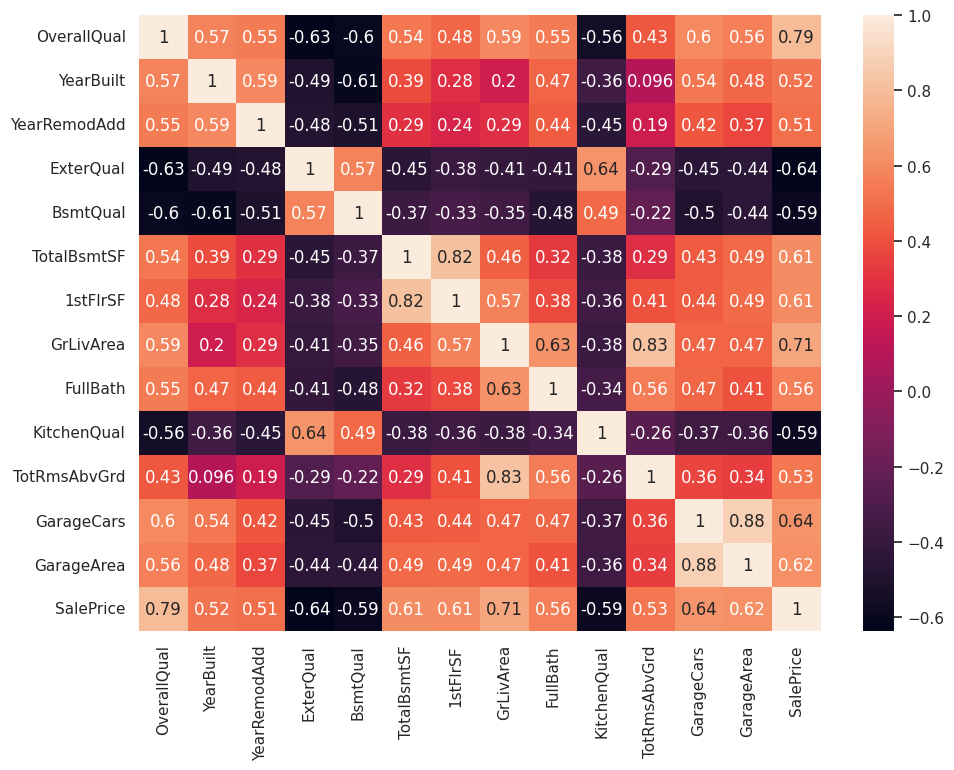

In [659]:
# most correlated features
correlationMatrix = trainData.corr()
plt.figure(figsize = (11,8))

top_corr = correlationMatrix.index[abs(correlationMatrix["SalePrice"])>0.5]
# top_corr
sns.heatmap(trainData[top_corr].corr(),annot=True)

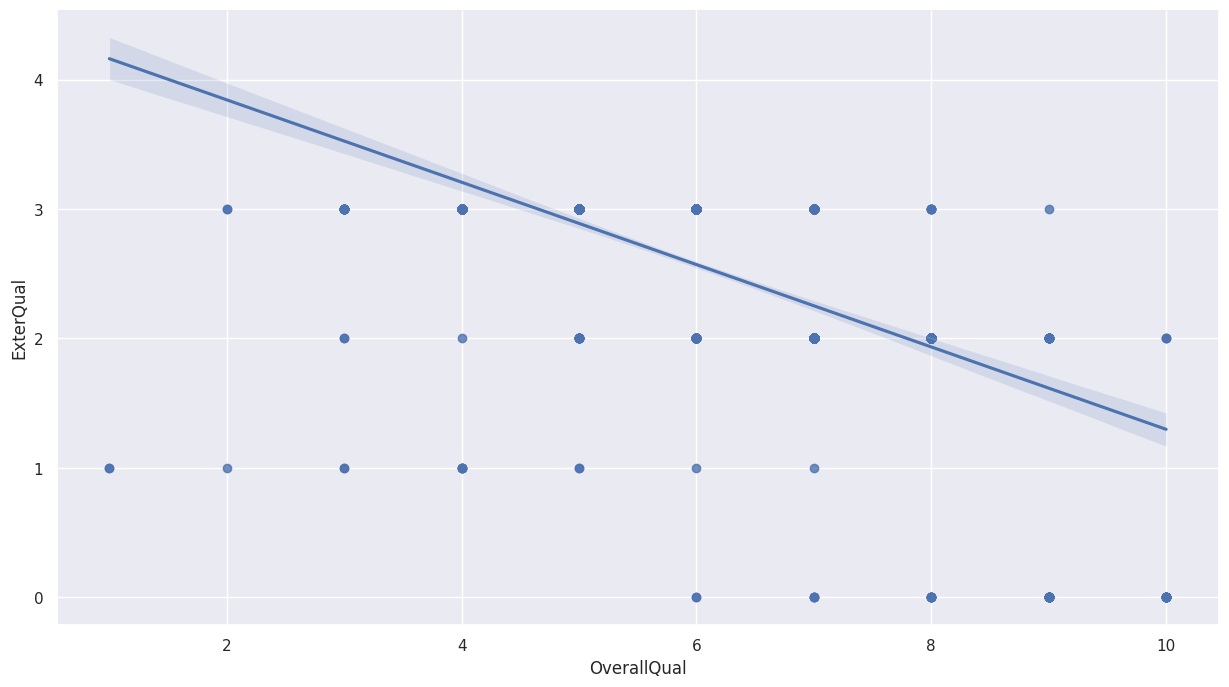

In [660]:
sns.regplot(data=trainData,x="OverallQual", y="ExterQual");

## Model Building

In [661]:
# features = ['OverallQual','YearBuilt','YearRemodAdd','ExterQual','BsmtQual','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','KitchenQual','TotRmsAbvGrd','GarageCars','GarageArea']
# x = trainData[features]
# y = trainData['SalePrice']


In [662]:
xTrain = trainData.drop(columns=['SalePrice'])
yTrain = trainData['SalePrice']
xTest = testData


In [663]:
xTestRegression.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,1,1,3,3,0,...,120,0,2,2,1,0,6,2010,9,4
1,1462,20,4,81.0,14267,1,1,0,3,0,...,0,0,2,4,0,12500,6,2010,9,4
2,1463,60,4,74.0,13830,1,1,0,3,0,...,0,0,2,2,1,0,3,2010,9,4
3,1464,60,4,78.0,9978,1,1,0,3,0,...,0,0,2,4,1,0,6,2010,9,4
4,1465,120,4,43.0,5005,1,1,0,1,0,...,144,0,2,4,1,0,1,2010,9,4


In [664]:
print(xTrain.shape)
print(yTrain.shape)

(1459, 80)
(1459,)


In [665]:
#Decision Tree Regressor
# note: Decision trees are highly sensitive to training data
decisionTreeRegressormodal = DecisionTreeRegressor().fit(xTrain, yTrain)

In [666]:
joblib.dump(decisionTreeRegressormodal, 'decisionTreeModel.pkl')
decisionTreeModel = joblib.load('decisionTreeModel.pkl')

In [667]:

testData['SalePriceDecisionTree'] = decisionTreeModel.predict(xTrain)
yPred = testData['SalePriceDecisionTree']
print(yPred.head(20))


0     208500.0
1     223500.0
2     140000.0
3     250000.0
4     143000.0
5     307000.0
6     200000.0
7     129900.0
8     118000.0
9     129500.0
10    345000.0
11    144000.0
12    279500.0
13    157000.0
14    132000.0
15    149000.0
16     90000.0
17    159000.0
18    139000.0
19    325300.0
Name: SalePriceDecisionTree, dtype: float64


In [668]:
print(testData[['Id', 'SalePriceDecisionTree']].head())

     Id  SalePriceDecisionTree
0  1461               208500.0
1  1462               223500.0
2  1463               140000.0
3  1464               250000.0
4  1465               143000.0


In [670]:
#Regression Model
xTestRegression = testData.drop(columns=['SalePriceDecisionTree'])
linearRegression = LinearRegression().fit(xTrain, yTrain)


In [671]:
print(xTrain.shape)
print(yTrain.shape)
xTestRegression.shape


(1459, 80)
(1459,)


(1459, 80)

In [672]:
joblib.dump(linearRegression, 'linearRegressionmodal.pkl')
linearRegressionmodal = joblib.load('linearRegressionmodal.pkl')


In [673]:
testData['SalePriceLinearRegression'] = linearRegressionmodal.predict(xTrain)
yPred1 = testData['SalePriceLinearRegression']
print(yPred1.head())
print(testData[['Id', 'SalePriceDecisionTree','SalePriceLinearRegression']])

0    216701.526890
1    216231.083962
2    174245.571439
3    289391.092149
4    166862.203277
Name: SalePriceLinearRegression, dtype: float64
        Id  SalePriceDecisionTree  SalePriceLinearRegression
0     1461               208500.0              216701.526890
1     1462               223500.0              216231.083962
2     1463               140000.0              174245.571439
3     1464               250000.0              289391.092149
4     1465               143000.0              166862.203277
...    ...                    ...                        ...
1454  2915               175000.0              164377.171597
1455  2916               210000.0              219368.303998
1456  2917               266500.0              240728.019612
1457  2918               142125.0              147470.380446
1458  2919               147500.0              160206.051370

[1459 rows x 3 columns]


In [675]:
# Random Forest
xTestRandomForest = testData.drop(columns=['SalePriceDecisionTree','SalePriceLinearRegression'])
randomForest = RandomForestRegressor().fit(xTrain, yTrain)


In [676]:
joblib.dump(randomForest, 'randomForestModel.pkl')
randomForestModel = joblib.load('randomForestModel.pkl')

In [705]:
testData['SalePriceRandomForest'] = randomForestModel.predict(xTrain)
yPred2 = testData['SalePriceRandomForest']
print(yPred2.head())
print(testData[['SalePriceDecisionTree','SalePriceDecisionTree','SalePriceLinearRegression','SalePriceRandomForest']].head(10))

0    206259.90
1    219115.89
2    152457.50
3    272885.37
4    146081.00
Name: SalePriceRandomForest, dtype: float64
   SalePriceDecisionTree  SalePriceDecisionTree  SalePriceLinearRegression  \
0               208500.0               208500.0              216701.526890   
1               223500.0               223500.0              216231.083962   
2               140000.0               140000.0              174245.571439   
3               250000.0               250000.0              289391.092149   
4               143000.0               143000.0              166862.203277   
5               307000.0               307000.0              286530.557090   
6               200000.0               200000.0              236578.546584   
7               129900.0               129900.0              160992.490527   
8               118000.0               118000.0              114175.289378   
9               129500.0               129500.0              124955.282418   

   SalePriceRandomFore

In [703]:
mseDecisionTree = mean_squared_error(yTrain, yPred)
mseRegression = mean_squared_error(yTrain, yPred1)
mseRandomForest= mean_squared_error(yTrain, yPred2)
rmseRegression = (mseRegression) ** (1/2)
rmseRandomForest = (mseRandomForest) ** (1/2)
rmseDecisionTree = (mseDecisionTree) ** (1/2)
print("Decision Tree: ",rmseDecisionTree)
print("Regression: ",rmseRegression)
print("Random Forest: ",rmseRandomForest)

Decision Tree:  0.0
Regression:  30441.397735460545
Random Forest:  11281.879809115411


In [700]:
r2ScoreDecisionTree= r2_score(yTrain, yPred)
print("Decision Tree: ",r2ScoreDecisionTree)
r2ScoreRegression= r2_score(yTrain, yPred1)
print("Regression: ",r2ScoreRegression)
r2ScoreRandomForest= r2_score(yTrain, yPred2)
print("Random Forest: ",r2ScoreRandomForest)


Decision Tree:  1.0
Regression:  0.8531671062322177
Random Forest:  0.9798322654551449
